### start code here:https://www.kaggle.com/philippsp/exploratory-analysis-zillow/notebook

In [3]:
import pandas as pd
import numpy as np
from scipy import stats

from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import time

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from fbprophet import Prophet
plt.style.use('fivethirtyeight')
import pickle
import gc
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
start = time.time()
prop = pd.read_csv('/Users/sunchenxi/Desktop/data/properties_2016.csv')
train = pd.read_csv("/Users/sunchenxi/Desktop/data/train_2016_v2.csv", parse_dates=["transactiondate"])
df_train = train.merge(prop, how='left', on='parcelid')
end = time.time()
print("time taken by thie script by now is {} sec.".format(end-start))

time taken by thie script by now is 42.0408790112 sec.


In [6]:
#数据size
print ("Shape Of Train: ",train.shape)
print ("Shape Of Properties: ",prop.shape)

('Shape Of Train: ', (90275, 3))
('Shape Of Properties: ', (2985217, 58))


In [7]:
merged = pd.merge(train,prop,on="parcelid",how="left")#进行左外链接

In [8]:
merged.head(3).transpose()

,0,1,2
parcelid,11016594,14366692,12098116
logerror,0.0276,-0.1684,-0.004
transactiondate,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00
airconditioningtypeid,1,NaN,1
architecturalstyletypeid,NaN,NaN,NaN
basementsqft,NaN,NaN,NaN
bathroomcnt,2,3.5,3
bedroomcnt,3,4,2
buildingclasstypeid,NaN,NaN,NaN
buildingqualitytypeid,4,NaN,4


### 使用numpy分析

In [9]:
for c, dtype in zip(df_train.columns, df_train.dtypes):
    if dtype == np.float64:
        df_train[c] = df_train[c].astype(np.float32) 
    elif dtype == np.int64:
        df_train[c] = df_train[c].astype(np.int32) 
gc.collect()

1204

In [14]:
df_train.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,transaction_month,transaction_year,abs_logerror
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,360170.0,2015.0,237416.0,6735.879883,NaN,NaN,6.037107e+13,1,2016,0.0276
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,585529.0,2015.0,239071.0,10153.019531,NaN,NaN,NaN,1,2016,0.1684
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,119906.0,2015.0,57912.0,11484.480469,NaN,NaN,6.037464e+13,1,2016,0.0040
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,244880.0,2015.0,73362.0,3048.739990,NaN,NaN,6.037296e+13,1,2016,0.0218
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,434551.0,2015.0,264977.0,5488.959961,NaN,NaN,6.059042e+13,1,2016,0.0050


In [10]:
df_train['transaction_month'] = df_train['transactiondate'].dt.month
df_train['transaction_year'] = df_train['transactiondate'].dt.year

In [11]:
#简单的numpy分析
me = np.mean(df_train['logerror']); med = np.median(df_train['logerror']); st = df_train['logerror'].std(); 
print(df_train['logerror'].describe())

count    90275.000000
mean         0.011458
std          0.161071
min         -4.605000
25%         -0.025300
50%          0.006000
75%          0.039200
max          4.737000
Name: logerror, dtype: float64


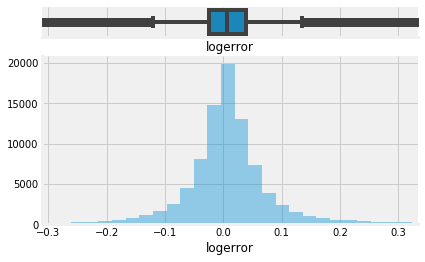

In [12]:
x = df_train['logerror']
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True ,
                                    gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(x, ax=ax_box)
sns.distplot(x, ax=ax_hist, bins=400, kde=False)
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
plt.xlim([me-2*st, me+2*st])
plt.show()

In [13]:
df_train.loc[:,'abs_logerror'] = df_train['logerror'].abs()

### 使用bokeh进行画图， logerror和其他特征的关系

In [12]:
from bokeh.palettes import Spectral4
from bokeh.plotting import figure, output_notebook, show

In [13]:
fips1 = pd.DataFrame(df_train.loc[df_train['fips']==6037].groupby('transactiondate')['abs_logerror'].mean())
fips1.reset_index(inplace = True)
fips2 = pd.DataFrame(df_train.loc[df_train['fips']==6059].groupby('transactiondate')['abs_logerror'].mean())
fips2.reset_index(inplace = True)
fips3 = pd.DataFrame(df_train.loc[df_train['fips']==6111].groupby('transactiondate')['abs_logerror'].mean())
fips3.reset_index(inplace = True)


output_notebook()
out = figure(plot_width=800, plot_height=250, x_axis_type="datetime")

for data, name, color in zip([fips1, fips2, fips3], ["Los Angeles", "Orange County", "Ventura County"], Spectral4):

    out.line(data['transactiondate'], data['abs_logerror'], line_width=2, color=color, alpha=0.8, legend=name)

out.legend.location = "top_left"
out.legend.click_policy="hide"
show(out)

Loading BokehJS ...

- Year Build Vs **Mean Error** in each County

In [14]:

fips1 = pd.DataFrame(df_train.loc[df_train['fips']==6037].groupby('yearbuilt')['abs_logerror'].mean())
fips1.reset_index(inplace = True)
fips2 = pd.DataFrame(df_train.loc[df_train['fips']==6059].groupby('yearbuilt')['abs_logerror'].mean())
fips2.reset_index(inplace = True)
fips3 = pd.DataFrame(df_train.loc[df_train['fips']==6111].groupby('yearbuilt')['abs_logerror'].mean())
fips3.reset_index(inplace = True)

output_notebook()
out = figure(plot_width=800, plot_height=250)

for data, name, color in zip([fips1, fips2, fips3], ["Los Angeles", "Orange County", "Ventura County"], Spectral4):

    out.line(data['yearbuilt'], data['abs_logerror'], line_width=2, color=color, alpha=0.8, legend=name)

out.legend.location = "top_right"
out.legend.click_policy="hide"
show(out)

Loading BokehJS ...

### 使用sklean进行聚类，使用folium进行在地图上画图

In [17]:
geo_df = df_train[['latitude', 'longitude','logerror']]

In [18]:
geo_df['longitude']/=1e6
geo_df['latitude']/=1e6

In [19]:
geo_df.dropna(subset=['latitude','longitude'], axis=0 ,inplace=True)

In [20]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=120, batch_size=1000).fit(geo_df[['latitude','longitude']])
geo_df.loc[:, 'label'] = kmeans.labels_

In [24]:
map_2 = folium.Map(location=[34.088537, -118.249923],
                   zoom_start=9)
for label in kmeans.cluster_centers_:
    folium.Marker(location=[label][0]).add_to(map_2)

map_2

In [44]:
map_1 = folium.Map(location=[34.088537, -118.249923], zoom_start=9,
                   tiles='Stamen Terrain')
for label in kmeans.cluster_centers_:
    folium.Marker(location=[label][0]).add_to(map_1)
map_1


In [23]:
del map_2 ,map_1
gc.collect()

12

### 使用seaborn画图，时间和logerror关系

 None]

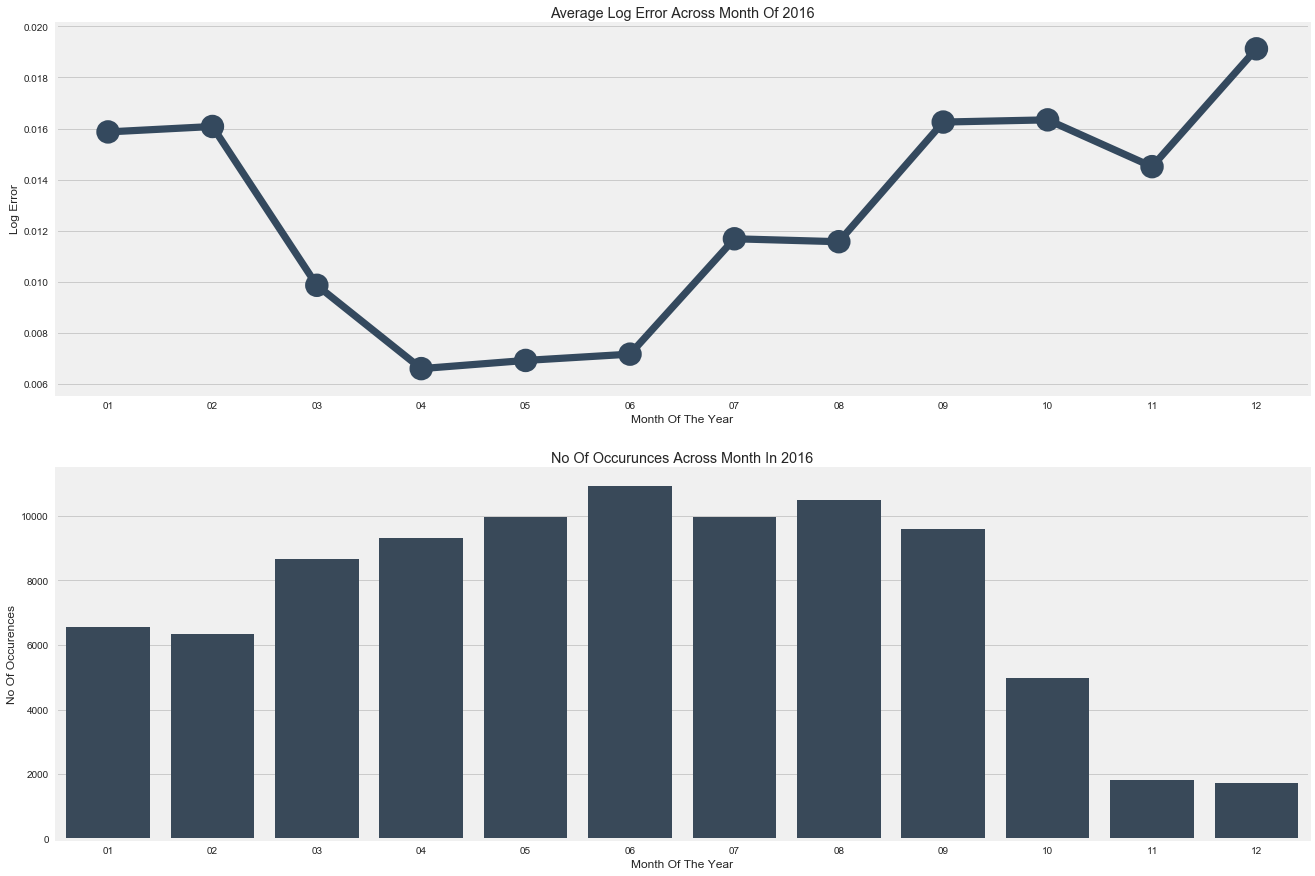

In [49]:
train["year"] = train.transactiondate.map(lambda x: str(x).split("-")[0])
train["month"] = train.transactiondate.map(lambda x: str(x).split("-")[1])
train["day"] = train.transactiondate.map(lambda x: str(x).split("-")[2].split()[0])

traingroupedMonth = train.groupby(["month"])["logerror"].mean().to_frame().reset_index()
traingroupedDay = train.groupby(["day"])["logerror"].mean().to_frame().reset_index()
fig,(ax1,ax2)= plt.subplots(nrows=2)
fig.set_size_inches(20,15)


sns.pointplot(x=traingroupedMonth["month"], y=traingroupedMonth["logerror"], data=traingroupedMonth, join=True,ax=ax1,color="#34495e")
ax1.set(xlabel='Month Of The Year', ylabel='Log Error',title="Average Log Error Across Month Of 2016",label='big')

sns.countplot(x=train["month"], data=train,ax=ax2,color="#34495e")
ax2.set(xlabel='Month Of The Year', ylabel='No Of Occurences',title="No Of Occurunces Across Month In 2016",label='big')

 None]

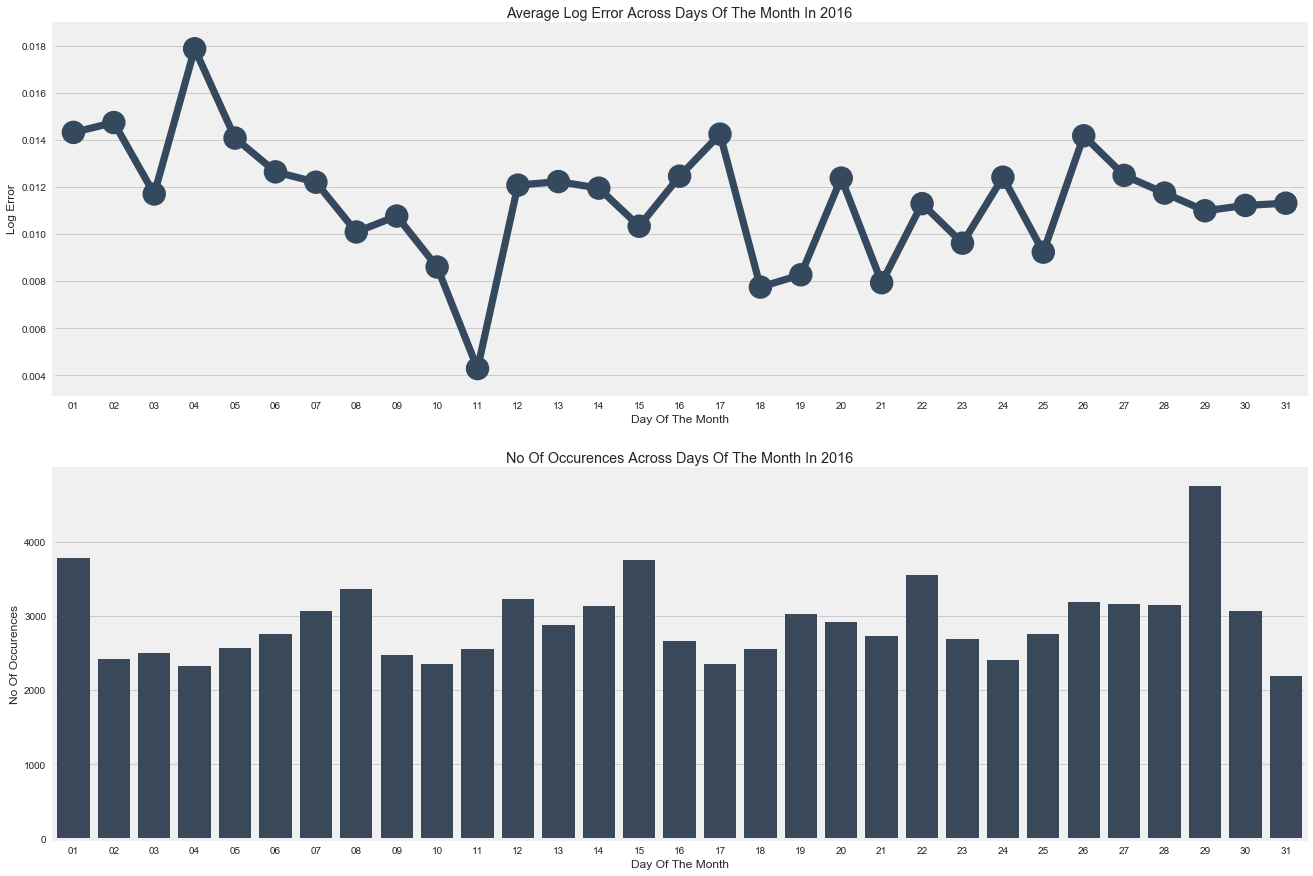

In [50]:
fig,(ax1,ax2)= plt.subplots(nrows=2)
fig.set_size_inches(20,15)

sns.pointplot(x=traingroupedDay["day"], y=traingroupedDay["logerror"], data=traingroupedDay, join=True,ax=ax1,color="#34495e")
ax1.set(xlabel='Day Of The Month', ylabel='Log Error',title="Average Log Error Across Days Of The Month In 2016",label='big')

sns.countplot(x=train["day"], data=train,ax=ax2,color="#34495e")
ax2.set(xlabel='Day Of The Month', ylabel='No Of Occurences',title="No Of Occurences Across Days Of The Month In 2016",label='big')

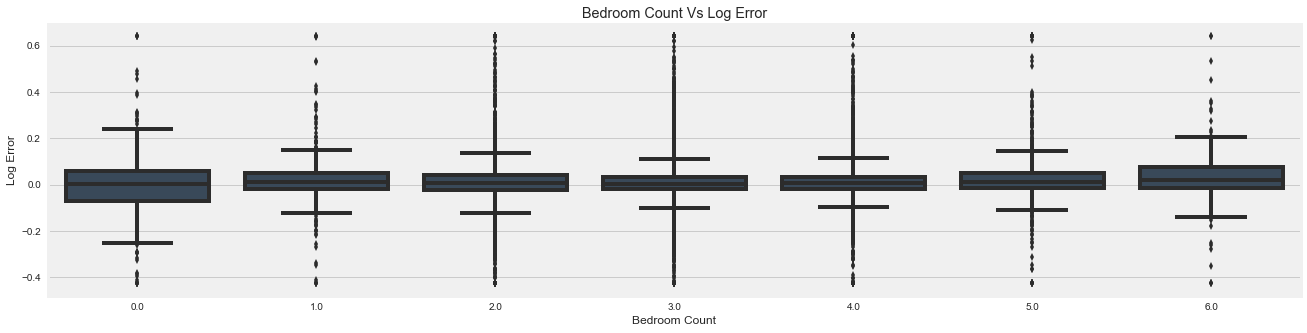

In [53]:
cols = ["bathroomcnt","bedroomcnt","roomcnt","numberofstories","logerror","calculatedfinishedsquarefeet"]
mergedFiltered = merged[cols].dropna()
for col in cols:
    ulimit = np.percentile(mergedFiltered[col].values, 99.5)
    llimit = np.percentile(mergedFiltered[col].values, 0.5)
    mergedFiltered[col].ix[mergedFiltered[col]>ulimit] = ulimit
    mergedFiltered[col].ix[mergedFiltered[col]<llimit] = llimit
fig,ax= plt.subplots()
fig.set_size_inches(20,5)
sns.boxplot(x="bedroomcnt", y="logerror", data=mergedFiltered,ax=ax,color="#34495e")
ax.set(ylabel='Log Error',xlabel="Bedroom Count",title="Bedroom Count Vs Log Error")

In [16]:
train.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02
